# Example

In [1]:
# import libraries
import gym
import gym_trading
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creating environment
env = gym.make('trading-v0', n_samples=10000, stack_size=5, fee=0.25)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')

Observation: [8664.7  8662.55 8671.2  8676.6  8664.2 ] (type: <class 'numpy.ndarray'>)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
while not done:

    # random action [BUY, SELL]
    action = np.random.randint(500)  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} -'
              f'Reward (AAV): {reward} -'
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 -Reward (AAV): 0 -Done: False - Price: [8662.55 8671.2  8676.6  8664.2  8661.3 ] (type: <class 'numpy.ndarray'>)
Iteration: 1000 -Reward (AAV): 0 -Done: False - Price: [9334.5  9341.9  9320.1  9331.85 9309.8 ] (type: <class 'numpy.ndarray'>)
Iteration: 2000 -Reward (AAV): 0 -Done: False - Price: [10123.2  10100.4  10099.8  10061.35 10100.  ] (type: <class 'numpy.ndarray'>)
Iteration: 3000 -Reward (AAV): -359.29039062500124 -Done: False - Price: [9650.  9649.7 9632.9 9640.3 9643.9] (type: <class 'numpy.ndarray'>)
Iteration: 4000 -Reward (AAV): -182.49760172526052 -Done: False - Price: [8616.8 8596.8 8596.8 8612.4 8675.1] (type: <class 'numpy.ndarray'>)
Iteration: 5000 -Reward (AAV): -182.49760172526052 -Done: False - Price: [7862.8 7861.5 7870.1 7869.9 7846.2] (type: <class 'numpy.ndarray'>)
Iteration: 6000 -Reward (AAV): -451.6563862304687 -Done: False - Price: [6345.1 6320.8 6281.6 6325.  6334.4] (type: <class 'numpy.ndarray'>)
Iteration: 7000 -Reward (AAV): -368.18078938

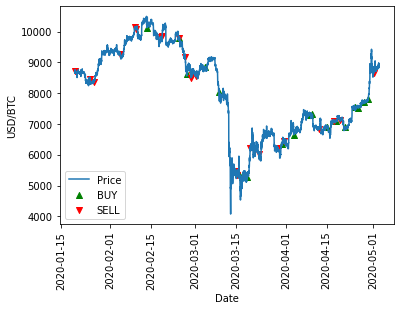

In [5]:
env.render()

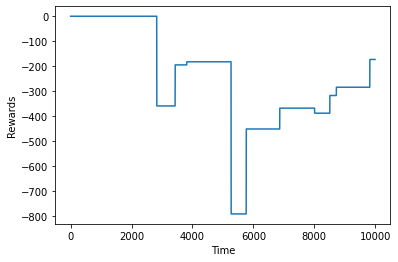

In [6]:
plt.plot(rewards)
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.show()